In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import os
import glob
import seaborn as sns


In [15]:
name_ma='ToyCar'


ids=['05','06','07']
for id in ids:
    strfind=r'result\a*'+name_ma+'*'+'_id_'+id+'.csv'
    datab = pd.DataFrame(columns=['name', 'error_b'])
    for csv in glob.glob(strfind):
        datab = datab.append(pd.read_csv(csv, names=['name','error_b']))
    datam = pd.DataFrame(columns=['name', 'error_m'])
    strfindm=r'Wigner\result\a*'+name_ma+'*'+'_id_'+id+'.csv'
    for csv in glob.glob(strfindm):
        datam = datam.append(pd.read_csv(csv, names=['name','error_m']))
    datam['name']=[x[:-4]+'wav' for x in datam['name'].values]
    # data=datab.merge(datam)
    databpm = pd.DataFrame(columns=['name', 'error_bpm'])
    databpm['error_bpm'] =datab['error_b'].values+2*datam['error_m'].values
    databpm['name']=datam['name']
    databpm.to_csv(r'D:\Projects\dcase\BPM_CSV\anomaly_score_'+name_ma+'_id_'+id+'.csv', index=False,header=False)

In [3]:
print(datam.head())

                        name   error_m
0  normal_id_01_00000000.wav  0.644279
1  normal_id_01_00000001.wav  0.296983
2  normal_id_01_00000002.wav  0.402323
3  normal_id_01_00000003.wav  0.140635
4  normal_id_01_00000004.wav  0.442214


In [4]:
print(datab.head())

                        name   error_b
0  normal_id_01_00000000.wav  8.969292
1  normal_id_01_00000001.wav  8.909879
2  normal_id_01_00000002.wav  9.783095
3  normal_id_01_00000003.wav  8.426964
4  normal_id_01_00000004.wav  8.680896


In [5]:
print(data.head())

                        name   error_b   error_m
0  normal_id_01_00000000.wav  8.969292  0.644279
1  normal_id_01_00000001.wav  8.909879  0.296983
2  normal_id_01_00000002.wav  9.783095  0.402323
3  normal_id_01_00000003.wav  8.426964  0.140635
4  normal_id_01_00000004.wav  8.680896  0.442214


In [25]:
data.describe()

,error_b,error_m
count,0.0,834.000000
mean,NaN,0.389127
std,NaN,0.191465
min,NaN,0.000203
25%,NaN,0.246736
50%,NaN,0.375589
75%,NaN,0.502515
max,NaN,1.343301


In [4]:
name_ma='pump'
strfind=r'result\a*'+name_ma+'*'+'.csv'

data = pd.DataFrame(columns=['name', 'error_b','error_m'])
for csv in glob.glob(strfind):
    data = data.append(pd.read_csv(csv, names=['name','error_b','error_m']))

,name,error_b,error_m,status,id
0,normal_id_00_00000000.wav,8.440063,0.397654,normal,00
1,normal_id_00_00000001.wav,8.722645,0.669554,normal,00
2,normal_id_00_00000002.wav,8.877702,0.058543,normal,00
3,normal_id_00_00000003.wav,9.197946,0.178577,normal,00
4,normal_id_00_00000004.wav,9.130987,0.177755,normal,00


In [10]:
data['status'] = data['name'].str.split('_').apply(lambda x: x[0])
data['id'] = data['name'].str.split('_').apply(lambda x: x[2])
data.head(5)

,name,error_b,error_m,status,id
0,normal_id_01_00000000.wav,8.969292,0.644279,normal,01
1,normal_id_01_00000001.wav,8.909879,0.296983,normal,01
2,normal_id_01_00000002.wav,9.783095,0.402323,normal,01
3,normal_id_01_00000003.wav,8.426964,0.140635,normal,01
4,normal_id_01_00000004.wav,8.680896,0.442214,normal,01


,name,error_b,error_m,status,id
0,normal_id_01_00000000.wav,8.969292,0.644279,normal,01
1,normal_id_01_00000001.wav,8.909879,0.296983,normal,01
2,normal_id_01_00000002.wav,9.783095,0.402323,normal,01
3,normal_id_01_00000003.wav,8.426964,0.140635,normal,01
4,normal_id_01_00000004.wav,8.680896,0.442214,normal,01


In [11]:
from sklearn.preprocessing import StandardScaler
#
# X=data[['error_b','error_m']].values
# sc=StandardScaler()
# X=sc.fit_transform(X)
data_na = data
# data_na[['error_b','error_m']]=X
print(data_na.head())

                        name   error_b   error_m  status  id
0  normal_id_01_00000000.wav  8.969292  0.644279  normal  01
1  normal_id_01_00000001.wav  8.909879  0.296983  normal  01
2  normal_id_01_00000002.wav  9.783095  0.402323  normal  01
3  normal_id_01_00000003.wav  8.426964  0.140635  normal  01
4  normal_id_01_00000004.wav  8.680896  0.442214  normal  01


01 auc =  0.82169375  pauc =  0.6807072368421052
02 auc =  0.671862676056338  pauc =  0.5329318013343217
03 auc =  0.7735514463501914  pauc =  0.5957548863432887
Ave auc=  0.7557026241355098 pauc=  0.6031313081732386


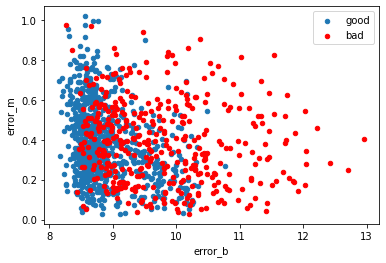

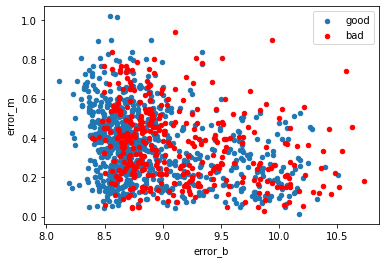

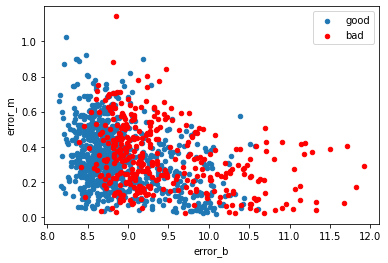

In [25]:
from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
ids=['01','02','03']
aucs=[]
paucs=[]
for id in ids:
    model= OneClassSVM(coef0=0.1,gamma='auto')
    dataplot=data_na[(data_na['id'] == id)][['status','error_b','error_m']]
    y_true=dataplot['status']
    y_true=y_true.replace('normal', -1)
    y_true=y_true.replace('anomaly', 1)
    y_true=y_true.values
    dataplot['ers']=2*dataplot['error_b'].values+dataplot['error_m'].values
    X=dataplot['ers'].values

    auc = metrics.roc_auc_score(y_true, X)
    aucp=metrics.roc_auc_score(y_true, X,max_fpr=0.1)
    aucs.append(auc)
    paucs.append(aucp)
    print(id, 'auc = ',auc,' pauc = ',aucp)
    ax=dataplot[(dataplot['status'] == 'normal')].plot( kind='scatter',x='error_b',y='error_m', label="good")
    dataplot[(dataplot['status'] == 'anomaly')].plot( color='red',kind='scatter',x='error_b',y='error_m', label="bad",ax=ax)
print('Ave auc= ', np.mean(aucs),'pauc= ',np.mean(paucs))